# PROJETO COVID 19 - UNITED STATES

Iremos analisar os dados de casos e mortes nos EUA, durante toda a pandemia. Além disso, iremos tentar prever as futuras mortes e casos, em todo o território. Depois, iremos analisar e tentar prever o futuro da pandemia em alguns estados específicos que fazem grande diferença nos dados nacionais(Califórnia, Flórida, New York e Texas).

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go

## Importando Dados
Direto do banco de Dados do New York Times

In [2]:
    # Vamos importar os dados do The New York Times
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
database = pd.read_csv(url, ',', parse_dates=['date'])
database.columns = ['data', 'casos', 'mortes']
database

,data,casos,mortes
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
476,2021-05-11,32806602,582362
477,2021-05-12,32842140,583210
478,2021-05-13,32880674,583990
479,2021-05-14,32921718,584722


## Tratamento de Dados

In [3]:
    # Vamos selecionar e só manter o que queremos
database = database.loc[
    (database.casos >= 1) &
    (database.mortes >= 0)
]
database

,data,casos,mortes
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
476,2021-05-11,32806602,582362
477,2021-05-12,32842140,583210
478,2021-05-13,32880674,583990
479,2021-05-14,32921718,584722


## Visualização dos Dados

In [4]:
    # Vamos visualizar os casos, durante toda a pandemia em um gráfico
px.line(database, 'data', 'casos', title='Casos Confirmados de Covid-19 nos EUA')

In [5]:
    # Agora, visualizar as mortes
px.line(database, 'data', 'mortes', title='Mortes Confirmadas de Covid-19 nos EUA')

## Importar Base de Dados dos estados

In [6]:
# Importar a base de dados do NY Times
url1 = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
database2 = pd.read_csv(url1, ',', parse_dates=['date'])

In [7]:
# Alterar o nome das colunas
database2.columns= ['data', 'estado', 'fips', 'casos', 'mortes']
print(database2)

            data         estado  fips   casos  mortes
0     2020-01-21     Washington    53       1       0
1     2020-01-22     Washington    53       1       0
2     2020-01-23     Washington    53       1       0
3     2020-01-24       Illinois    17       1       0
4     2020-01-24     Washington    53       1       0
...          ...            ...   ...     ...     ...
24154 2021-05-15       Virginia    51  669918   11008
24155 2021-05-15     Washington    53  424499    5663
24156 2021-05-15  West Virginia    54  158230    2757
24157 2021-05-15      Wisconsin    55  669636    7712
24158 2021-05-15        Wyoming    56   59079     712

[24159 rows x 5 columns]


In [8]:
# Agora, criar as variáveis para posterior utilização
ca = database2.loc[database2['estado'] == 'California']
fl = database2.loc[database2['estado'] == 'Florida']
ny = database2.loc[database2['estado'] == 'New York']
tx = database2.loc[database2['estado'] == 'Texas']

## Visualização de Dados

In [9]:
# Visualização os casos da Califórnia
px.line(ca, 'data', 'casos', title='Casos confirmados de Covid-19 na Califórnia')

In [10]:
# Visualização os casos da Flórida
px.line(fl, 'data', 'casos', title='Casos confirmados de Covid-19 na Flórida')

In [11]:
# Visualizar os casos em New York
px.line(ny, 'data', 'casos', title='Casos confirmados de Covid-19 em New York')

In [12]:
# Visualizar os casos no Texas
px.line(tx, 'data', 'casos', title='Casos confirmados de Covid-19 no Texas')

In [13]:
# Visualizar as mortes na Califórnia
px.line(ca, 'data', 'mortes', title='Mortes confirmadas de Covid-19 na Califórnia')

In [14]:
# Visualizar as mortes na Flórida
px.line(fl, 'data', 'mortes', title='Mortes confirmadas de Covid-19 na Flórida')

In [15]:
# Visualizar as mortes em New York
px.line(ny, 'data', 'mortes', title='Mortes confirmadas de Covid-19 em New York')

In [16]:
# Visualizar as mortes no Texas
px.line(tx, 'data', 'mortes', title='Mortes confirmadas de Covid-19 no Texas')

# Casos Por Dia

In [17]:
# Criar uma nova coluna dentro da base de dados para os casos diários
database['novos casos'] = list(map(
    lambda x: 0 if (x==0) else database['casos'].iloc[x] - database['casos'].iloc[x-1],
    np.arange(database.shape[0])
))

# Visualizar os casos diários no país inteiro
px.line(database, 'data', 'novos casos', title='Casos confirmados de Covid-19 por dia nos EUA')

In [18]:
# Califórnia
ca['novos casos'] = list(map(
    lambda x: 0 if (x==0) else ca['casos'].iloc[x] - ca['casos'].iloc[x-1],
    np.arange(ca.shape[0])
))
# Vamos visualizar os casos diários na Califórnia
px.line(ca, 'data', 'novos casos', title='Casos confirmados de Covid-19 por dia na Califórnia')

<ipython-input-18-0f2b9cc90c66>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
# Agora a Flórida
fl['novos casos'] = list(map(
    lambda x: 0 if (x==0) else fl['casos'].iloc[x] - fl['casos'].iloc[x-1],
    np.arange(fl.shape[0])
))

# Vamos visualizar os cados por dia na Flórida
px.line(ca, 'data', 'novos casos', title='Casos Confirmados de Covid-19 por dia na Flórida')

<ipython-input-19-87462c1489e1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# New York
ny['novos casos'] = list(map(
    lambda x: 0 if (x==0) else ny['casos'].iloc[x] - ny['casos'].iloc[x-1],
    np.arange(ny.shape[0])
))

# Visualizar o gráfico
px.line(ny, 'data', 'novos casos', title='Casos Confirmados de Covid-19 por dia em New York')

<ipython-input-20-ff019b58bb95>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
# Agora analisar o Texas
tx['novos casos'] = list(map(
    lambda y: 0 if (y==0) else tx['casos'].iloc[y] - tx['casos'].iloc[y-1],
    np.arange(tx.shape[0])
))

# Visualizar o gráfico
px.line(tx, 'data', 'novos casos', title='Casos Confirmados de Covid-19 por dia no Texas')

<ipython-input-21-d9960610e8c0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Taxa de Crescimento de Mortes e Casos

In [22]:
def taxa_cresc(database, x1, data_inicio=None, data_fim=None):
    if data_inicio == None:
        data_inicio = database.data.loc[database[x1] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    
    if data_fim == None:
        data_fim = database.data.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
    
    # Definir os valores do passado e do presente
    passado = database.loc[database.data == data_inicio, x1].values[0]
    presente = database.loc[database.data == data_fim, x1].values[0]
    n = (data_fim - data_inicio).days
    
    # Calcular a taxa
    taxa = (presente/passado)**(1/n) -1
    return taxa*100


In [23]:
# Visualizar a taxa de crescimento médio de casos, durante toda a pandemia
    # Em todo os EUA
print("Taxa de Crescimento Médio de Casos em todo os EUA: ", taxa_cresc(database, 'casos'))
    # Na California
print("Taxa de Crescimento Médio de Casos na Califórnia: ", taxa_cresc(ca, 'casos'))
    # Na Flórida
print("Taxa de Crescimento Médio de Casos na Flórida: ", taxa_cresc(fl, 'casos'))
    # Em New York
print("Taxa de Crescimento Médio de Casos em New York: ", taxa_cresc(ny, 'casos'))
    # No Texas
print("Taxa de Crescimento Médio de Casos no Texas: ", taxa_cresc(tx, 'casos'))

Taxa de Crescimento Médio de Casos em todo os EUA:  3.672177153046041
Taxa de Crescimento Médio de Casos NA Califórnia:  3.2322413777709613
Taxa de Crescimento Médio de Casos na Flórida:  3.221413744366197
Taxa de Crescimento Médio de Casos em New York:  3.361801521249008
Taxa de Crescimento Médio de Casos no Texas:  3.304532694485718


In [24]:
# Visualizar a taxa de crescimento médio de mortes, durante toda a pandemia
    # Em todo os EUA
print("Taxa de Crescimento Médio de Mortes em todo os EUA: ", taxa_cresc(database, 'mortes'))
    # Na Califórnia
print("Taxa de Crescimento Médio de Mortes na Califórnia: ",taxa_cresc(ca, 'mortes'))
    # Na Flórida
print("Taxa de Crescimento Médio de Mortes na Flórida: ",taxa_cresc(fl, 'mortes'))
    # Em New York
print("Taxa de Crescimento Médio de Mortes em New York: ", taxa_cresc(ny, 'mortes'))
    # No Texas
print("Taxa de Crescimento Médio de Mortes no Texas: ", taxa_cresc(tx, 'mortes'))

Taxa de Crescimento Médio de Mortes em todo os EUA:  3.057101543595797
Taxa de Crescimento Médio de Mortes na Califórnia:  2.559730896992818
Taxa de Crescimento Médio de Mortes na Flórida:  2.278360974865823
Taxa de Crescimento Médio de Mortes em New York:  2.4110604679265624
Taxa de Crescimento Médio de Mortes no Texas:  2.5837893342101292


In [25]:
# Agora, vamos calcular a taxa de mortalidade da pandemia
    # Em todo o território dos EUA
taxmorte_eua =  (database['mortes'].iloc[-1] / database['casos'].iloc[-1]) *100
print("Taxa de mortalidade em todo os EUA: ", taxmorte_eua)
    # Na Califórnia
taxmorte_ca = (ca['mortes'].iloc[-1] / ca['casos'].iloc[-1]) *100
print("Taxa de mortalidade na Califórnia: ", taxmorte_ca)
    # Na Flórida
taxmorte_fl = (fl['mortes'].iloc[-1] / fl['casos'].iloc[-1]) *100
print("Taxa de mortalidade na Flórida: ", taxmorte_fl)
    # Em New York
taxmorte_ny = (ny['mortes'].iloc[-1] / ny['casos'].iloc[-1]) *100
print("Taxa de mortalidade em New York: ", taxmorte_ny)
    # No Texas
taxmorte_tx = (tx['mortes'].iloc[-1] / tx['casos'].iloc[-1]) *100
print("Taxa de mortalidade no Texas: ", taxmorte_tx)

Taxa de mortalidade em todo os EUA:  1.7762304846917678
Taxa de mortalidade na Califórnia:  1.6625835889735405
Taxa de mortalidade na Flórida:  1.5747883611980533
Taxa de mortalidade em New York:  2.5159948716495313
Taxa de mortalidade no Texas:  1.7449721719534264


## Previsões

In [26]:
# Trabalhar com as previsões
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [27]:
# Começando pelos casos
casos_eua = database.casos
casos_eua.index = database.data
casos_ca = ca.casos
casos_ca.index = ca.data
casos_fl = fl.casos
casos_fl.index = fl.data
casos_ny = ny.casos
casos_ny.index = ny.data
casos_tx = tx.casos
casos_tx.index = tx.data

In [28]:
# Fazer a decomposição
dec_eua = seasonal_decompose(casos_eua)
dec_ca = seasonal_decompose(casos_ca)
dec_fl = seasonal_decompose(casos_fl)
dec_ny = seasonal_decompose(casos_fl)
dec_tx = seasonal_decompose(casos_tx)

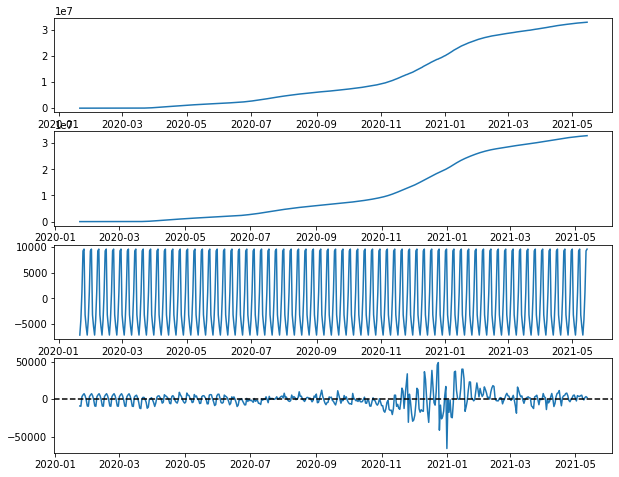

In [29]:
# Trabalhar primeiro com os dados dos EUA
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_eua.observed) # Observados
ax2.plot(dec_eua.trend) # Tendência
ax3.plot(dec_eua.seasonal) # Sazonalidade
ax4.plot(casos_eua.index, dec_eua.resid) # Ruído
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

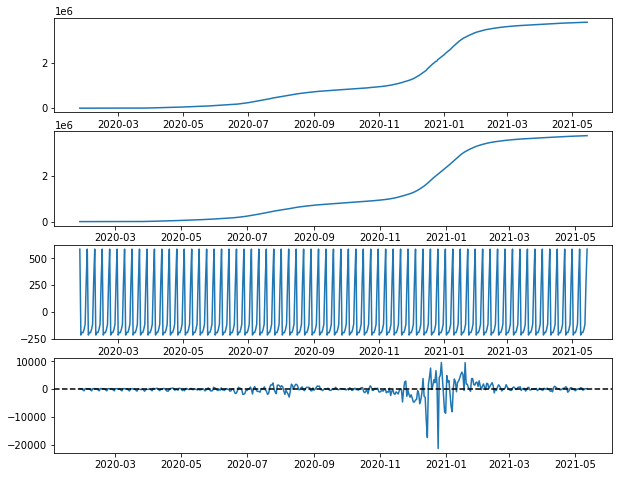

In [30]:
# Dados da Califórnia
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_ca.observed)
ax2.plot(dec_ca.trend)
ax3.plot(dec_ca.seasonal)
ax4.plot(casos_ca.index, dec_ca.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

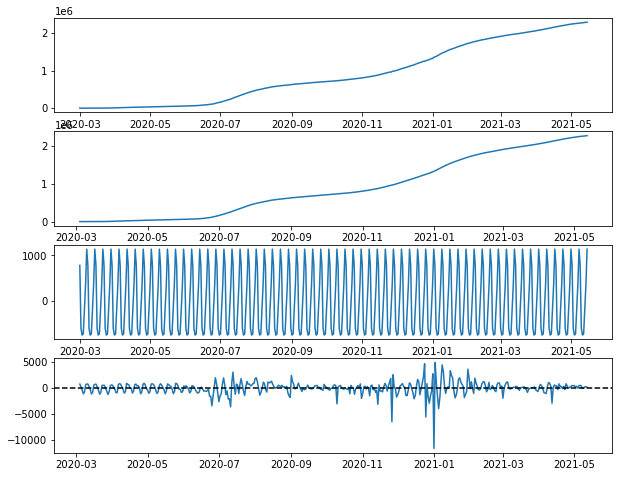

In [31]:
# Dados da Flórida
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_fl.observed)
ax2.plot(dec_fl.trend)
ax3.plot(dec_fl.seasonal)
ax4.plot(casos_fl.index, dec_fl.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

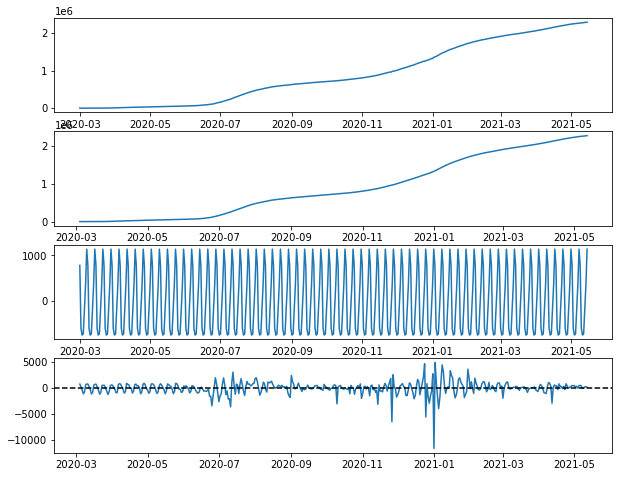

In [32]:
# Dados de New York
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_ny.observed)
ax2.plot(dec_ny.trend)
ax3.plot(dec_ny.seasonal)
ax4.plot(casos_ny.index, dec_ny.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

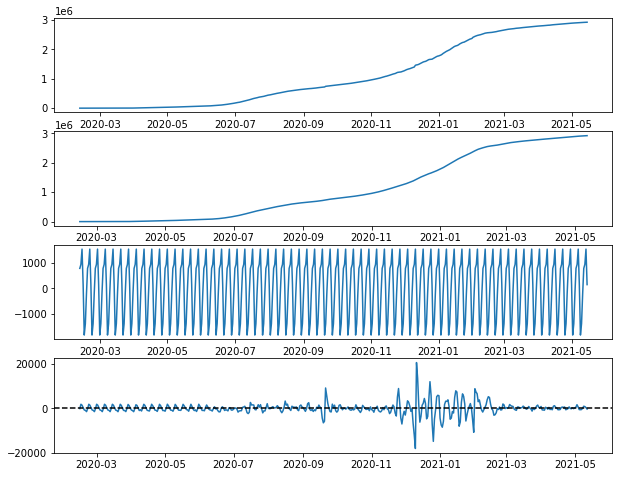

In [33]:
# Dados do Texas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_tx.observed)
ax2.plot(dec_tx.trend)
ax3.plot(dec_tx.seasonal)
ax4.plot(casos_tx.index, dec_tx.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

In [34]:
# Começando a trabalhar com as mortes
mortes_eua = database.mortes
mortes_eua.index = database.data
mortes_ca = ca.mortes
mortes_ca.index = ca.data
mortes_fl = fl.mortes
mortes_fl.index = fl.data
mortes_ny = ny.mortes
mortes_ny.index = ny.data
mortes_tx = tx.mortes
mortes_tx.index = tx.data

In [35]:
# Fazer a decomposição
dec_m_eua = seasonal_decompose(mortes_eua)
dec_m_ca = seasonal_decompose(mortes_ca)
dec_m_fl = seasonal_decompose(mortes_fl)
dec_m_ny = seasonal_decompose(mortes_fl)
dec_m_tx = seasonal_decompose(mortes_tx)

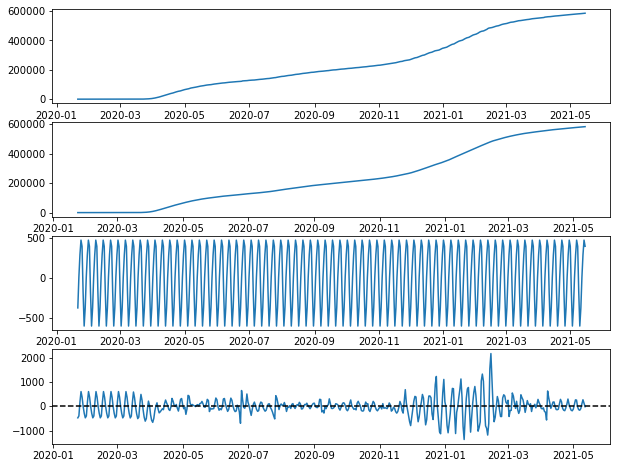

In [36]:
# Dados de todo os EUA
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_eua.observed) # Observados
ax2.plot(dec_m_eua.trend) # Tendência
ax3.plot(dec_m_eua.seasonal) # Sazonalidade
ax4.plot(mortes_eua.index, dec_m_eua.resid) # Ruído
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

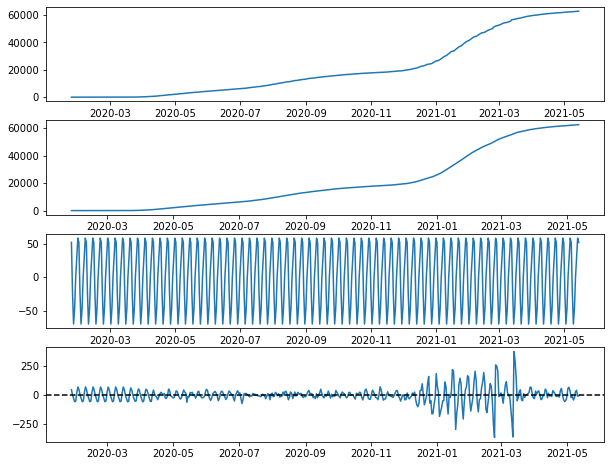

In [37]:
# Dados da Califórnia
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_ca.observed)
ax2.plot(dec_m_ca.trend)
ax3.plot(dec_m_ca.seasonal)
ax4.plot(mortes_ca.index, dec_m_ca.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

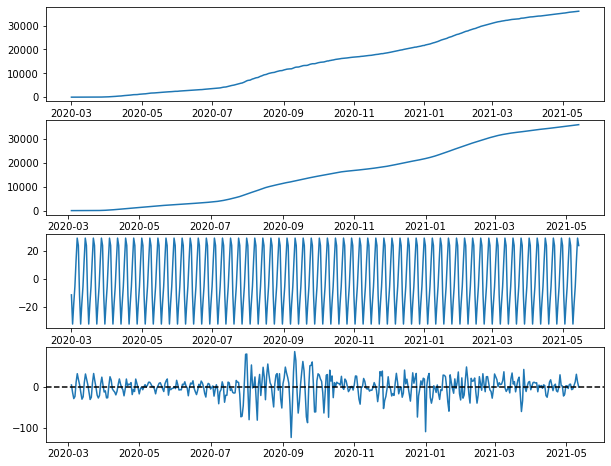

In [38]:
# Dados da Flórida
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_fl.observed)
ax2.plot(dec_m_fl.trend)
ax3.plot(dec_m_fl.seasonal)
ax4.plot(mortes_fl.index, dec_m_fl.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

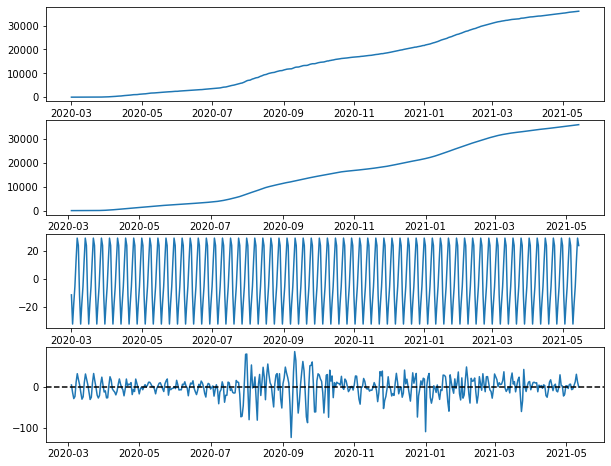

In [39]:
# Dados de New York
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_ny.observed)
ax2.plot(dec_m_ny.trend)
ax3.plot(dec_m_ny.seasonal)
ax4.plot(mortes_ny.index, dec_m_ny.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

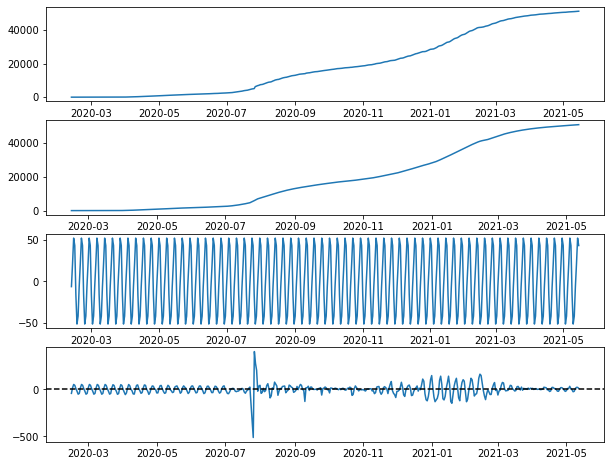

In [40]:
# Dados do Texas
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,8))

ax1.plot(dec_m_tx.observed)
ax2.plot(dec_m_tx.trend)
ax3.plot(dec_m_tx.seasonal)
ax4.plot(mortes_tx.index, dec_m_tx.resid)
ax4.axhline(0, linestyle='dashed', c='black')
plt.show()

### Importar a biblioteca ARIMA

In [41]:
from pmdarima.arima import auto_arima

### Previsões do Auto Arima para os casos

In [42]:
# Criar as variáveis com o modelo Auto Arima
modelo_eua = auto_arima(casos_eua)
modelo_ca = auto_arima(casos_ca)
modelo_fl = auto_arima(casos_fl)
modelo_ny = auto_arima(casos_ny)
modelo_tx = auto_arima(casos_tx)


## Visualização da previsões 

In [44]:
# Todo os EUA
fig1 = go.Figure(go.Scatter(
    x = casos_eua.index, y = casos_eua, name="Observados"
))
fig1.add_trace(go.Scatter(
    x = casos_eua.index, y = modelo_eua.predict_in_sample(), name='Previsão'
))
fig1.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y = modelo_eua.predict(45), name='Previsão'
))
fig1.update_layout(title='Previsão de casos até o fim de Abril de 2021 nos EUA')
fig1.show()

In [45]:
# Na Califórnia
fig2 = go.Figure(go.Scatter(
    x = casos_ca.index, y = casos_ca, name = "Observados"
))
fig2.add_trace(go.Scatter(
    x = casos_ca.index, y= modelo_ca.predict_in_sample(), name="Previsão"
))
fig2.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y = modelo_ca.predict(45), name="Previsão"
))
fig2.update_layout(title="Previsão de casos até o final de abril de 2021 na Califórnia")
fig2.show()

In [46]:
# Na Flórida
fig3 = go.Figure(go.Scatter(
    x = casos_fl.index, y = casos_fl, name="Observados"
))
fig3.add_trace(go.Scatter(
    x = casos_fl.index, y = modelo_fl.predict_in_sample(), name="Previsão"
))
fig3.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y = modelo_fl.predict(45), name="Previsão"
))
fig3.update_layout(title="Previsão de casos até o final de abril na Flórida")
fig3.show()

In [47]:
    # Em New York
fig4 = go.Figure(go.Scatter(
    x = casos_ny.index, y= casos_ny, name="Observados"
))
fig4.add_trace(go.Scatter(
    x = casos_ny.index, y = modelo_ny.predict_in_sample(), name="Previsão"
))
fig4.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y= modelo_ny.predict(45), name="Previsão"
))
fig4.update_layout(title="Previsão de casos até o final de abril de 2021 em New York")
fig4.show()

In [48]:
    # No Texas
fig5 = go.Figure(go.Scatter(
    x = casos_tx.index, y= casos_tx, name="Observados"
))
fig5.add_trace(go.Scatter(
    x = casos_tx.index, y= modelo_tx.predict_in_sample(), name="Previsão"
))
fig5.add_trace(go.Scatter(
    x= pd.date_range("2021-05-16", "2021-06-30"), y = modelo_tx.predict(45), name="Previsão"
))
fig5.update_layout(title="Previsão de casos até o final de abril de 2021 no Texas")
fig5.show()

### Previsões do Auto Arima para as mortes

In [49]:
# Criar os modelos com as previsões
modelo_eua_m = auto_arima(mortes_eua)
modelo_ca_m = auto_arima(mortes_ca)
modelo_fl_m = auto_arima(mortes_fl)
modelo_ny_m = auto_arima(mortes_ny)
modelo_tx_m = auto_arima(mortes_tx)

## Visualização das Previsões

In [51]:
# Todo os EUA
fig5 = go.Figure(go.Scatter(
    x = mortes_eua.index, y = mortes_eua, name="Observados"
))
fig5.add_trace(go.Scatter(
    x = mortes_eua.index, y = modelo_eua_m.predict_in_sample(), name='Previsão'
))
fig5.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y = modelo_eua_m.predict(45), name='Previsão'
))
fig5.update_layout(title='Previsão de mortes até o final de abril de 2021 nos EUA')
fig5.show()

In [52]:
# Na Califórnia
fig6 = go.Figure(go.Scatter(
    x = mortes_ca.index, y = mortes_ca, name = "Observados"
))
fig6.add_trace(go.Scatter(
    x = mortes_ca.index, y= modelo_ca_m.predict_in_sample(), name="Previsão"
))
fig6.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y = modelo_ca_m.predict(45), name="Previsão"
))
fig6.update_layout(title="Previsão de mortes até o final de abril de 2021 na Califórnia")
fig6.show()


In [53]:
    # Na Flórida
fig7 = go.Figure(go.Scatter(
    x = casos_fl.index, y = casos_fl, name="Observados"
))
fig7.add_trace(go.Scatter(
    x = casos_fl.index, y = modelo_fl.predict_in_sample(), name="Previsão"
))
fig7.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y = modelo_fl.predict(45), name="Previsão"
))
fig7.update_layout(title="Previsão de mortes até o final de abril de 2021 na Flórida")
fig7.show()

In [54]:
    # Em New York
fig8 = go.Figure(go.Scatter(
    x = mortes_ny.index, y= mortes_ny, name="Observados"
))
fig8.add_trace(go.Scatter(
    x = mortes_ny.index, y = modelo_ny_m.predict_in_sample(), name="Previsão"
))
fig8.add_trace(go.Scatter(
    x = pd.date_range("2021-05-16", "2021-06-30"), y= modelo_ny_m.predict(45), name="Previsão"
))
fig8.update_layout(title="Previsão de mortes até o final de abril de 2021 em New York")
fig8.show()

In [55]:
    # No Texas
fig9 = go.Figure(go.Scatter(
    x = mortes_tx.index, y= mortes_tx, name="Observados"
))
fig9.add_trace(go.Scatter(
    x = mortes_tx.index, y= modelo_tx_m.predict_in_sample(), name="Previsão"
))
fig9.add_trace(go.Scatter(
    x= pd.date_range("2021-05-16", "2021-06-30"), y = modelo_tx_m.predict(45), name="Previsão"
))
fig9.update_layout(title="Previsão de mortes até o final de abril de 2021 no Texas")
fig9.show()

## Conclusão

### Estados Unidos

#### Casos Confirmados

- Grande número de casos totais confirmados, chegando a aproximadamente 33 milhões de casos, até o momento;
- Momento de maior acréscimo no número de casos, que ocorrerá durante a última forte onda, foi entre novembro e o meio do mês de janeiro, momento em que a troca do presidente americano ocorreu e o ínicio da vacinação em massa se iniciou.
- Após o início da vacinação em massa, o começo da política de incentivo a proteção individual (distanciamento social e utilização de máscaras) e as políticas de lockdown, vistas em muitos estados americanos, começou a se visualizar uma grande tendência de desaceleração do número de casos.
- No mês de maio, momento em que fora feita a análise, o número de casos ativos já apresentavam um grande declínio e os casos por dia já se aproximavam de números apresentados no ínicio da pandemia.
- Ao visualizar os dados da taxa de crescimento médio de casos no país, conseguimos chegar a conclusão que, como analisamos somente alguns estados em específico, esse índice nacional está muito mais alto do que os analisados nos estados estudados.

#### Mortes Confirmadas

- A tendência de mortes acompanha fortemente a tendência de casos, com um atraso de somente alguns dias, como pode se verificar nos gráficos;
- Com todas ações que estão sendo tomadas, já citadas na análise de casos confirmados, as mortes estão apresentando declínio, há alguns meses, e tendência de estabilidade no curto prazo. Provando, assim, a grande eficácia das vacinas utilizadas no país em conjunto com as medidas de controle de circulação;
- Assim como já visto nos dados de casos, a taxa de crescimento médio de mortes, quando citamos o índice nacional, é muito maior do que as apresentadas nos estados estudados em específico.

### Califórnia

#### Casos confirmados

- O estado da Califórnia não segue fielmente os dados vistos em todo território americano, pois somente apresentou duas fortes ondas de contágio, mas que, ainda sim, deixaram o estado com uma alta taxa de mortalidade, quando comparada com outros estados estudados;
- Assim como o resto do território americano, a Califórnia já apresenta tendência de diminuição do contágio entre seus residentes, ocasionando em uma quase estabilização nos casos totais.
- A taxa de crescimento médio de casos no estado se mostra entre as melhores, quando comparada com outros estados estudados e o índice nacional.

#### Mortes Confirmadas

- O estado da Califórnia apresentou duas ondas de contágio e mortes. A primeira, apresentou dados de mortes mais baixos, porém, a segunda que, de maneira geral, costuma ser a pior, houve um alto número de óbitos pela doença, aumentando fortemente a mortalidade da doença;
- Assim como nos casos confirmados, as mortes apresentam um dos dados mais baixos entre os estudados, porém mais próximos dos índices nacionais.

### Flórida

#### Casos confirmados

- A Flórida não apresentou oscilação entre momentos de baixas nos casos e fortes ondas, apresentando somente um contágio quase sempre constante, se descolando fortemente do resto do país, até atingir a forte segunda onda, onde todos estados apresentaram forte sincronia;
- Assim como na Califórnia e nos índices nacionais, a vacinação em massa e o distanciamento social já demonstram sua forte eficácia no combate ao vírus;
- Posicionando-se extremamente próximo a Califórnia nas taxas de crescimento médio de casos, a Flórida posiciona-se na melhor posição dentre os estudados, mostrando, talvez, que sua estratégia de combate ao contágio seja fortemente eficiente.


#### Mortes Confirmadas

- Assim como nos casos confirmados, as mortes não apresentaram ondas fortes como nos outros estados e no índice nacional, somente entre novembro/20 e janeiro/21;
- Assim como analisado nos casos confirmados, a taxa de crescimento médio das mortes se mostraram muito abaixo dos outros índices estudados, posicionando o estado na melhor posição;
- As mortes diárias já apresentam queda a longo prazo e grande estabilidade em pouco espaço de tempo.

### New York

#### Casos confirmados

- No começo da pandemia, Nova York se apresentou como o estado com maiores problemas de controle da pandemia e isso refletiu fortemente os altos números da taxa de crescimento médio de casos;
- Com o grande aumento no começo da pandemia, o estado conseguiu se manter com certa estabilidade por meses, até o momento em que se iniciou a segunda onda, quando todos estados se sincronizaram e tiveram aumento no número de casos;
- O estado se posiciona como o pior, dentre os estudados, mostrando sua estratégia mal executada e estudada, durante a pandemia.


#### Mortes confirmadas

- Os dados de mortes, como em outros estados, seguem fielmente a análise feita nos casos confirmados;
- Ao contrário da taxa de crescimento média de casos, a mesma taxa relativa a mortes no estado, se mostrou na segunda melhor posição entre os estudados, mostrando um combate ruim no controle do contágio, mas um excelente tratamento aos contaminados.

### Texas

#### Casos confirmados

- O Texas mostrou um forte combate a pandemia, durante a primeira e a segunda onda;
- Se distanciando de momentos que poderiam propiciar em colapso do sistema de saúde, o estado apresentou ondas sem grande espaço de tempo;
- O estado se coloca no meio do ranking entre os estudados quando falamos de taxa média de casos, mostrando um número razoável no combate ao contágio.

#### Mortes confirmadas

- As mortes, assim como nos outros estados, seguiram a tendência vista nos casos. Portanto, a análise gráfica é a mesma;
- Mesmo tendo se posicionado no meio da tabela da taxa média de crescimento de casos, quando falamos da mesma taxa no quesito mortes, o estado cai uma colocação e entra como penúltimo mais mal colocado. Mostrando, assim, um controle um pouco mais eficaz, todavia um tratamento pior aos contaminados.

## Conclusão Geral Sobre a Previsão

A previsão segue a mesma tendência explanada pelos infectologistas. Com o aumento da vacinação, o país apresentará cada vez menos casos e mortes pela doença. Podendo, assim, voltar ao novo normal em questão de poucos meses, caso não apareça alguma variante que coloque em risco a eficácia das vacinas. Algo possível de acontecer, caso outros países não controlem a doença em seu território.